-----------------------------------------
DEBUGGING INFORMATION (Post-Correction Run):
Is data_filtered empty: False
Columns in data_filtered: ['return', 'COMP_VALUE', 'COMP_MOMENTUM', 'COMP_QUALITY_PROFIT', 'COMP_GROWTH', 'COMP_VOLATILITY_PREMIUM', 'COMP_EXPENSE_CONTROL']
Expected factor columns (new_factor_cols): ['COMP_VALUE', 'COMP_MOMENTUM', 'COMP_QUALITY_PROFIT', 'COMP_GROWTH', 'COMP_VOLATILITY_PREMIUM', 'COMP_EXPENSE_CONTROL']
-----------------------------------------
All expected factor columns are present in 'data_filtered.columns'.
Successfully selected columns into 'factor_data_for_corr'.

6 Composite Factors Correlation Matrix (Before 2020-01-01):
                         COMP_VALUE  COMP_MOMENTUM  COMP_QUALITY_PROFIT  \
COMP_VALUE                 1.000000       0.108666             0.063989   
COMP_MOMENTUM              0.108666       1.000000            -0.003829   
COMP_QUALITY_PROFIT        0.063989      -0.003829             1.000000   
COMP_GROWTH                0.018

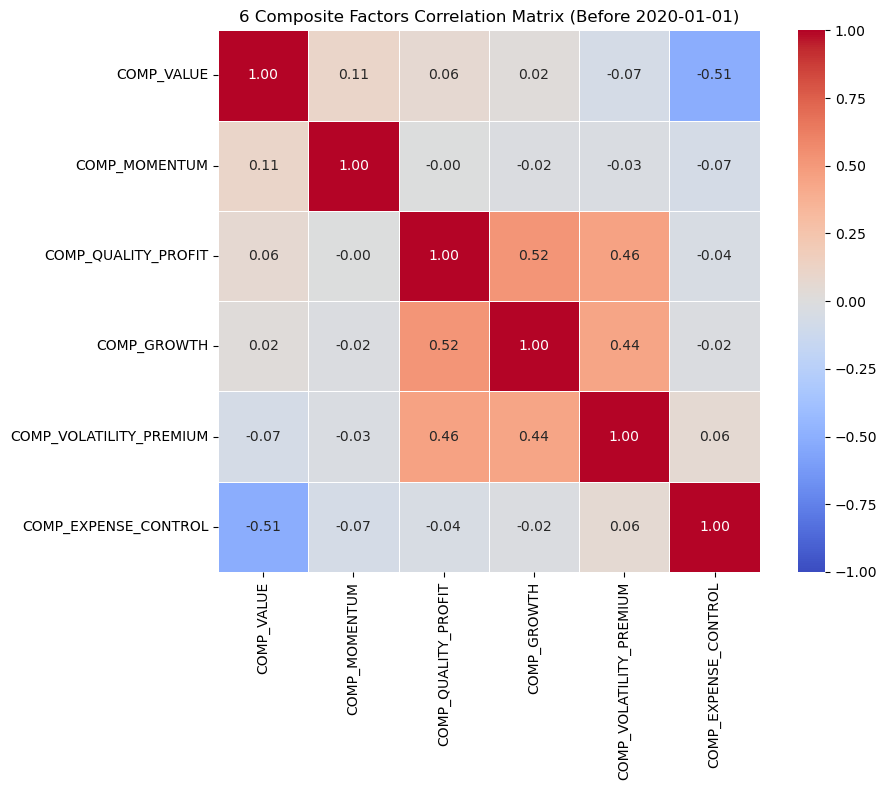

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 用户可配置参数 ---
factor_filename = 'data_6_composite_factors.pkl'

# 新的6个复合因子的列名 (已修正 'COMP_QUALITY_PROFIT')
new_factor_cols = [
    'COMP_VALUE',
    'COMP_MOMENTUM',
    'COMP_QUALITY_PROFIT', # 确保与DataFrame中的列名完全一致
    'COMP_GROWTH',
    'COMP_VOLATILITY_PREMIUM',
    'COMP_EXPENSE_CONTROL'
]

date_filter_active = True
end_date_filter = pd.to_datetime('2020-01-01')

plot_title = '6 Composite Factors Correlation Matrix (Before 2020-01-01)'
# --- 配置结束 ---

# 1. 读取新的因子数据
try:
    data_new_factors = pd.read_pickle(factor_filename)
except FileNotFoundError:
    print(f"Error: File '{factor_filename}' not found.")
    exit()

# 2. 日期过滤
data_filtered = data_new_factors
if date_filter_active:
    if 'date' not in data_new_factors.index.names:
        print("Error: DataFrame index must be MultiIndex with a level named 'date'.")
        print(f"Current index levels: {data_new_factors.index.names}")
        exit()
    date_index = data_new_factors.index.get_level_values('date')
    data_filtered = data_new_factors[date_index < end_date_filter]
    if data_filtered.empty:
        print(f"Warning: After date filtering, 'data_filtered' is empty.")
else:
    data_filtered = data_new_factors.copy()

# 3. 调试和列检查 

# 确认所有期望的列都存在于 data_filtered 中
if not data_filtered.empty:
    missing_cols = [col for col in new_factor_cols if col not in data_filtered.columns]
    if missing_cols:
        print(f"Error: The following factor columns ARE STILL MISSING from 'data_filtered': {missing_cols}")
        print(f"Available columns in 'data_filtered' are: {data_filtered.columns.tolist()}")
        exit()
    else:
        print("All expected factor columns are present in 'data_filtered.columns'.")
elif data_filtered.empty and new_factor_cols:
    print(f"Error: 'data_filtered' is empty, but was expecting columns. Cannot proceed.")
    exit()

# 选取列
try:
    if data_filtered.empty:
        factor_data_for_corr = pd.DataFrame(columns=new_factor_cols)
        print("Initialized 'factor_data_for_corr' as an empty DataFrame.")
    else:
        factor_data_for_corr = data_filtered[new_factor_cols]
        print("Successfully selected columns into 'factor_data_for_corr'.")
except KeyError as e:
    print(f"CRITICAL KeyError during column selection: {e}")
    exit()

# 4. 计算相关性矩阵
if factor_data_for_corr.empty:
    print("Cannot compute correlation matrix because 'factor_data_for_corr' is empty.")
else:
    corr_matrix_new = factor_data_for_corr.corr()
    print("\n6 Composite Factors Correlation Matrix (Before 2020-01-01):")
    print(corr_matrix_new)

    # 5. 可视化相关性矩阵（热力图）
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, vmin=-1, vmax=1)
    plt.title(plot_title)
    plt.tight_layout()
    plt.show()

正在回测因子: COMP_VALUE...
正在回测因子: COMP_MOMENTUM...
正在回测因子: COMP_QUALITY_PROFIT...
正在回测因子: COMP_GROWTH...
正在回测因子: COMP_VOLATILITY_PREMIUM...
正在回测因子: COMP_EXPENSE_CONTROL...

--- 回测业绩评估 ---
因子: COMP_VALUE
  夏普比率: 1.13
  最大回撤: -43.06%
  年化收益率: 100.89%
  年化波动率: 61.12%
因子: COMP_MOMENTUM
  夏普比率: 1.53
  最大回撤: -39.51%
  年化收益率: 101.59%
  年化波动率: 45.16%
因子: COMP_QUALITY_PROFIT
  夏普比率: 0.90
  最大回撤: -26.56%
  年化收益率: 26.37%
  年化波动率: 23.01%
因子: COMP_GROWTH
  夏普比率: 1.39
  最大回撤: -13.40%
  年化收益率: 30.28%
  年化波动率: 17.11%
因子: COMP_VOLATILITY_PREMIUM
  夏普比率: 0.37
  最大回撤: -39.04%
  年化收益率: 12.92%
  年化波动率: 24.94%
因子: COMP_EXPENSE_CONTROL
  夏普比率: -0.99
  最大回撤: -95.88%
  年化收益率: -39.02%
  年化波动率: 51.83%

--- 正在绘制各因子累计收益曲线 ---


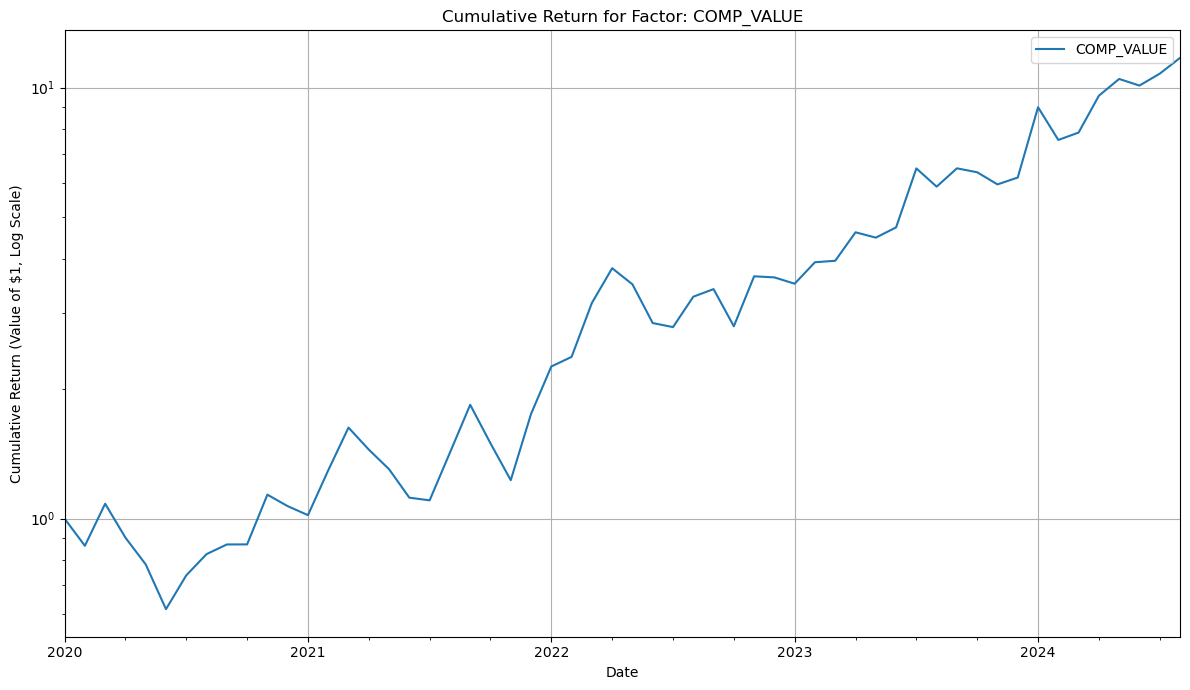

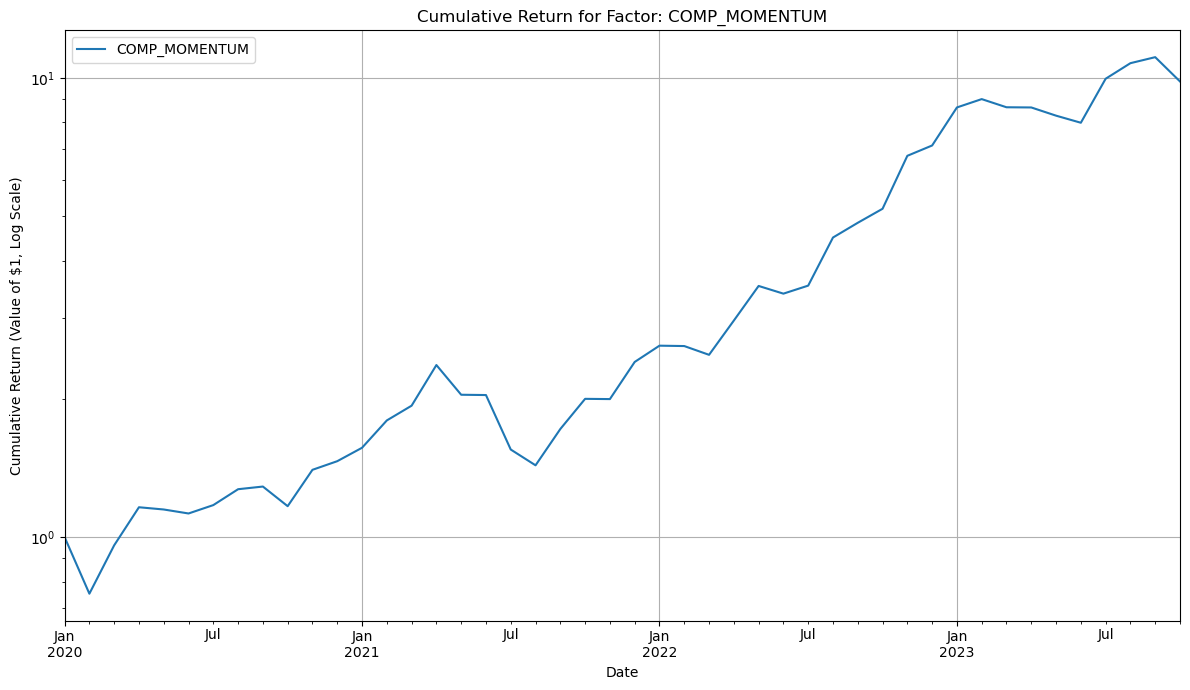

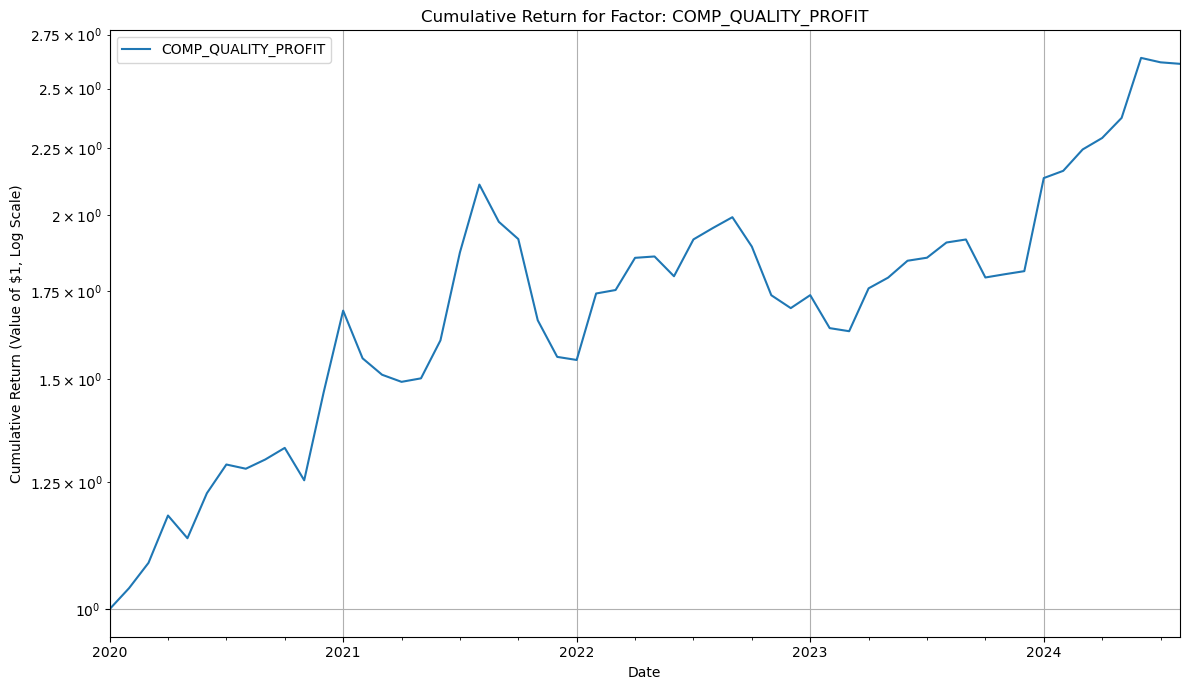

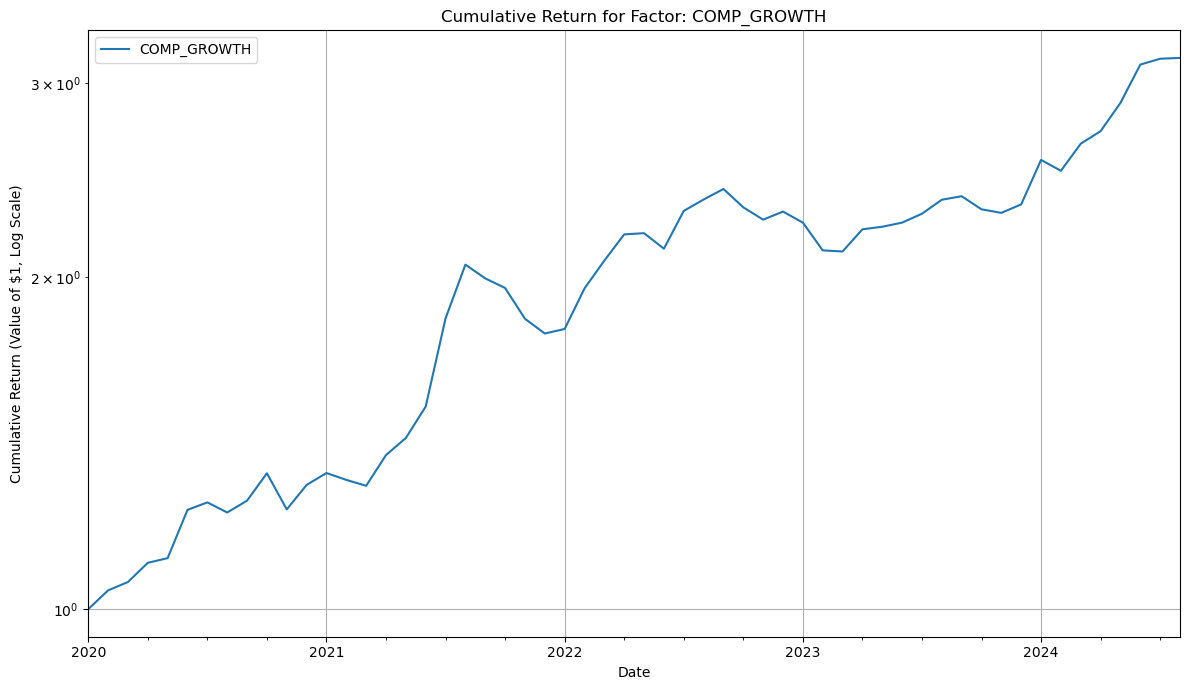

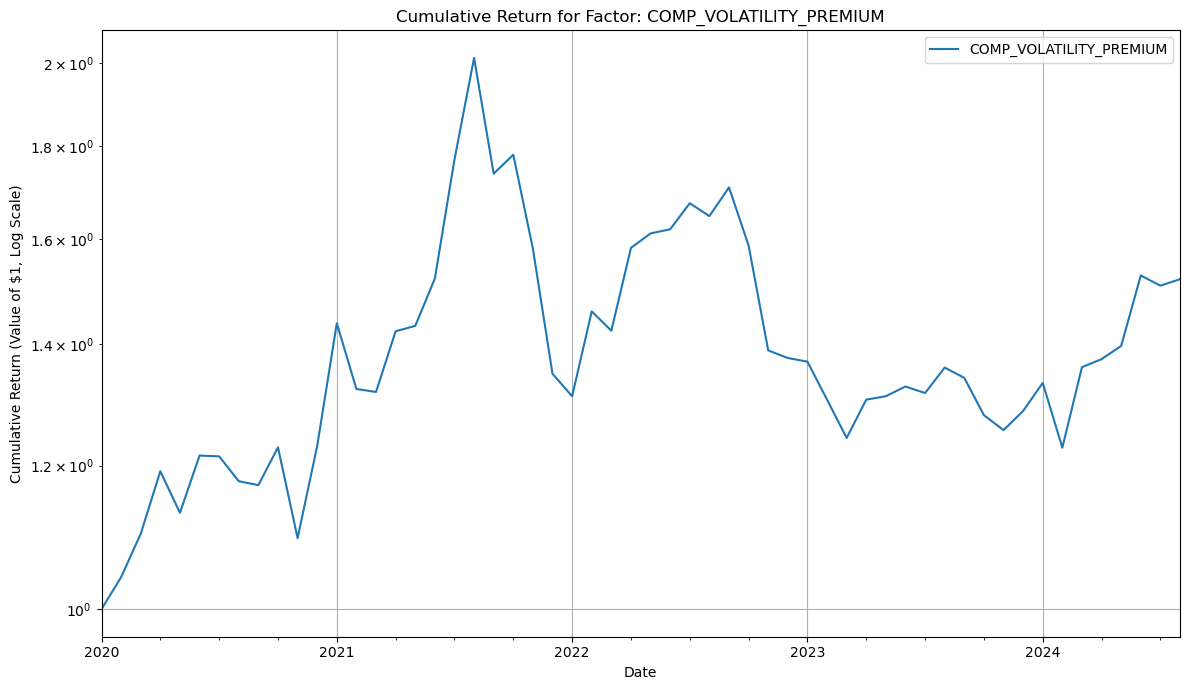

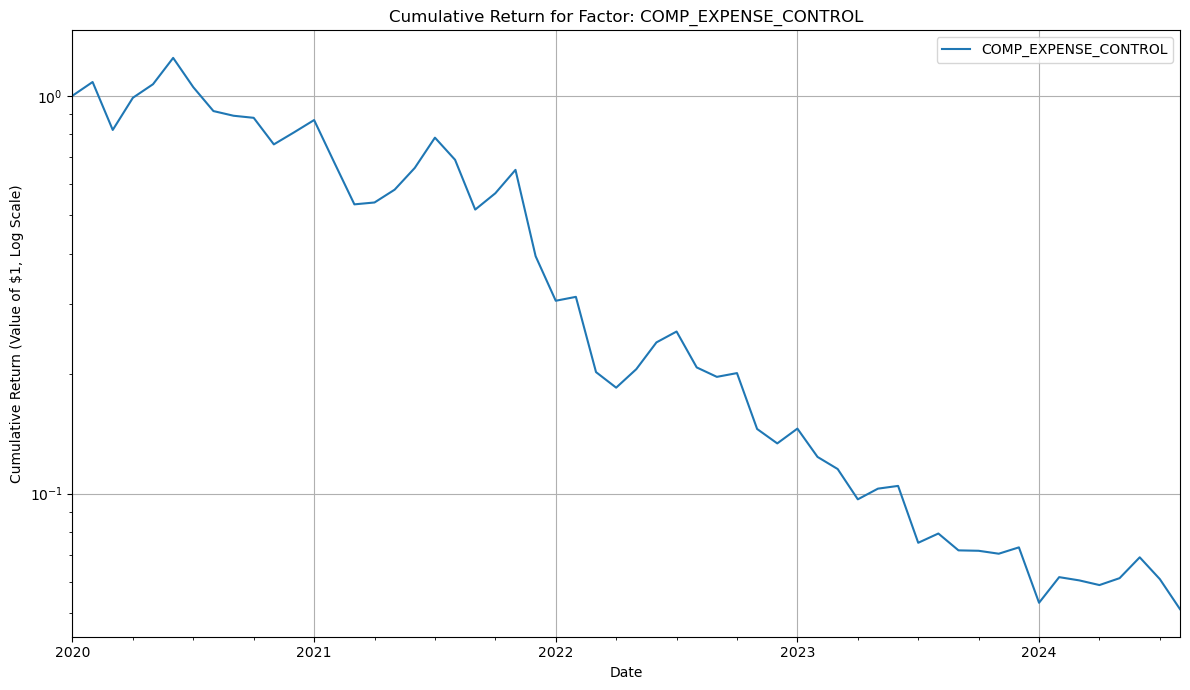


--- 所有任务执行完毕 ---


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 配置参数 ---
factor_filename = 'data_6_composite_factors.pkl'
output_factor_names = [ # 新的6个复合因子的列名
    'COMP_VALUE',
    'COMP_MOMENTUM',
    'COMP_QUALITY_PROFIT',
    'COMP_GROWTH',
    'COMP_VOLATILITY_PREMIUM',
    'COMP_EXPENSE_CONTROL'
]
start_date_backtest = pd.to_datetime('2020-01-01')
risk_free_rate = 0.03 # 年化无风险利率
min_stocks_for_backtest = 10 # 当月符合条件股票少于此数目则不进行分组回测

# --- 2. 读取数据 ---
try:
    data_full = pd.read_pickle(factor_filename)
except FileNotFoundError:
    print(f"错误: 文件 '{factor_filename}' 未找到。请确保文件名正确。")
    exit()

# --- 3. 日期过滤 ---
if 'date' not in data_full.index.names:
    print("错误: DataFrame 的索引必须是包含名为 'date' 层级的 MultiIndex。")
    print(f"当前索引层级: {data_full.index.names}")
    exit()

date_index_values = data_full.index.get_level_values('date')
data = data_full[date_index_values >= start_date_backtest].copy()

if data.empty:
    print(f"错误: 在 {start_date_backtest.strftime('%Y-%m-%d')} 之后没有数据可用于回测。")
    exit()

# --- 4. 创建目标收益列 (下一期收益) ---
# target_return 是 t+1 月的收益，将由 t 月的因子来预测
data['target_return'] = data.groupby(level='stock')['return'].shift(-1) # 使用正确的索引名 'stock'

# --- 5. 准备回测日期 ---
unique_dates = sorted(data.index.get_level_values('date').unique())
if len(unique_dates) > 1:
    dates_for_loop = unique_dates[:-1] # 排除最后一个日期，因为它的 target_return 会是 NaN
else:
    print("错误: 回测周期内有效日期不足2天，无法进行移位操作和回测。")
    dates_for_loop = []
    exit()

# --- 6. 初始化回测结果存储 ---
factor_performance_results = {}

# --- 7. 回测主逻辑 ---
for factor_col_name in output_factor_names:
    monthly_portfolio_returns = [] # 存储当月因子计算出的多空组合的【下一月】的实际收益
    print(f"正在回测因子: {factor_col_name}...")

    for current_decision_date in dates_for_loop:
        # current_decision_date 是我们观察因子并构建组合的月份（例如2020-01-31）
        # 对应的 target_return 是下一个月的收益（例如2020-02-29实现的收益）
        df_month_data = data.xs(current_decision_date, level='date').copy()

        # 确保当月因子值和下一期目标收益都存在
        df_month_data.dropna(subset=[factor_col_name, 'target_return'], inplace=True)

        if df_month_data.empty:
            monthly_portfolio_returns.append(np.nan)
            continue
            
        num_stocks_this_month = len(df_month_data)

        if num_stocks_this_month < min_stocks_for_backtest:
            monthly_portfolio_returns.append(np.nan)
            continue

        df_month_data['rank'] = df_month_data[factor_col_name].rank(method='first', ascending=False)
        
        num_stocks_in_quintile = int(np.ceil(num_stocks_this_month * 0.2))
        
        if num_stocks_in_quintile == 0:
            monthly_portfolio_returns.append(np.nan)
            continue

        top_stocks_criteria = df_month_data['rank'] <= num_stocks_in_quintile
        bottom_stocks_criteria = df_month_data['rank'] > (num_stocks_this_month - num_stocks_in_quintile)

        long_portfolio_return = df_month_data.loc[top_stocks_criteria, 'target_return'].mean()
        short_portfolio_return = df_month_data.loc[bottom_stocks_criteria, 'target_return'].mean()

        if pd.isna(long_portfolio_return) or pd.isna(short_portfolio_return):
            monthly_portfolio_returns.append(np.nan)
        else:
            monthly_portfolio_returns.append(long_portfolio_return - short_portfolio_return)

    # --- 7.g 存储带日期索引的因子月度收益序列 ---
    # monthly_portfolio_returns 中的第 i 个收益，是基于 dates_for_loop[i] 的因子，
    # 在 unique_dates[i+1] 这个月末实现的。
    effective_return_end_dates = []
    valid_monthly_returns_for_series = []
    
    for i in range(len(monthly_portfolio_returns)):
        return_value = monthly_portfolio_returns[i]
        if not pd.isna(return_value):
            valid_monthly_returns_for_series.append(return_value)
            # 对应的收益实现日期 (即下一期的日期)
            effective_return_end_dates.append(unique_dates[i+1]) 
            
    if not valid_monthly_returns_for_series:
        print(f"警告: 因子 {factor_col_name} 在整个回测期间没有有效的月度组合收益。")
        # 创建一个空的DatetimeIndexed Series以保持一致性
        factor_performance_results[factor_col_name] = pd.Series([], dtype=float, index=pd.to_datetime([],errors='coerce'))
    else:
        factor_performance_results[factor_col_name] = pd.Series(
            valid_monthly_returns_for_series, 
            index=pd.DatetimeIndex(effective_return_end_dates), 
            dtype=float
        )

# --- 8. 评估函数 ---
def calculate_sharpe_ratio(returns_series, rf_rate=0.03):
    if returns_series.empty or returns_series.isnull().all() or len(returns_series) < 2 :
        return np.nan
    excess_returns = returns_series - (rf_rate / 12)
    std_dev = returns_series.std(ddof=1)
    if std_dev == 0 or pd.isna(std_dev):
        return np.nan
    return (excess_returns.mean() / std_dev) * np.sqrt(12) if std_dev else np.nan


def calculate_max_drawdown(returns_series):
    if returns_series.empty or returns_series.isnull().all():
        return np.nan
    cumulative_returns = (1 + returns_series).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calculate_annualized_return(returns_series):
    if returns_series.empty or returns_series.isnull().all():
        return np.nan
    # (1 + mean_monthly_return) ** 12 - 1
    return (1 + returns_series.mean())**12 - 1

def calculate_annualized_volatility(returns_series):
    if returns_series.empty or returns_series.isnull().all() or len(returns_series) < 2:
        return np.nan
    return returns_series.std(ddof=1) * np.sqrt(12)

# --- 9. 输出每个因子的评估结果 ---
print("\n--- 回测业绩评估 ---")
for factor_name, rets_series in factor_performance_results.items():
    print(f"因子: {factor_name}")
    if rets_series.empty or rets_series.isnull().all() or len(rets_series) < 2:
        print("  数据不足或全为NaN，无法计算业绩指标。")
    else:
        print(f"  夏普比率: {calculate_sharpe_ratio(rets_series, risk_free_rate):.2f}")
        print(f"  最大回撤: {calculate_max_drawdown(rets_series):.2%}")
        print(f"  年化收益率: {calculate_annualized_return(rets_series):.2%}")
        print(f"  年化波动率: {calculate_annualized_volatility(rets_series):.2%}")
    print("="*30)

# --- 10. 绘制累计收益曲线 ---
print("\n--- 正在绘制各因子累计收益曲线 ---")
for factor_name, monthly_rets_series in factor_performance_results.items():
    
    if not isinstance(monthly_rets_series, pd.Series):
        print(f"跳过因子 {factor_name} 的绘图: 预期为 pandas Series，实际为 {type(monthly_rets_series)}.")
        continue
        
    cleaned_rets_series = monthly_rets_series.dropna()
    
    if cleaned_rets_series.empty:
        print(f"跳过因子 {factor_name} 的绘图: 清理NaN后收益序列为空。")
        continue

    cumulative_ret_values = (1 + cleaned_rets_series).cumprod()

    start_plot_date = None
    # 确保索引是 DatetimeIndex 并且非空
    if isinstance(cleaned_rets_series.index, pd.DatetimeIndex) and not cleaned_rets_series.index.empty:
        first_return_period_end_date = cleaned_rets_series.index[0]
        try:
            inferred_freq = pd.infer_freq(cleaned_rets_series.index[:5])
            if inferred_freq:
                offset = pd.tseries.frequencies.to_offset(inferred_freq)
                start_plot_date = first_return_period_end_date - offset
            else: 
                start_plot_date = first_return_period_end_date - pd.DateOffset(months=1) # 近似
        except Exception:
             start_plot_date = first_return_period_end_date - pd.DateOffset(months=1) # 更保守的近似
    
    plt.figure(figsize=(12, 7))

    if start_plot_date is not None and isinstance(cleaned_rets_series.index, pd.DatetimeIndex):
        plot_series = pd.concat([pd.Series([1.0], index=[start_plot_date]), cumulative_ret_values])
        plot_series.plot(label=f'{factor_name}', grid=True)
        plt.xlabel('Date')
    else:
        print(f"警告: 因子 {factor_name} 的X轴可能不是日期或无法确定精确起始点。使用数字序列X轴。")
        y_values_to_plot = [1.0] + list(cumulative_ret_values.values)
        x_values_to_plot = list(range(len(y_values_to_plot)))
        plt.plot(x_values_to_plot, y_values_to_plot, label=f'{factor_name}')
        plt.xlabel('Period Number')

    plt.title(f'Cumulative Return for Factor: {factor_name}')
    plt.ylabel('Cumulative Return (Value of $1, Log Scale)')
    plt.legend()
    plt.grid(True)
    plt.yscale('log') # 使用对数刻度Y轴
    plt.tight_layout()
    plt.show()

print("\n--- 所有任务执行完毕 ---")